<a href="https://colab.research.google.com/github/aayushikapoor29/lp3/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [7]:
# correlation
df.select_dtypes(include=[np.number]).corr()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [8]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7eb963a70b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb963a710d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb963b15b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb963a71640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb963a71940>],
 'means': []}

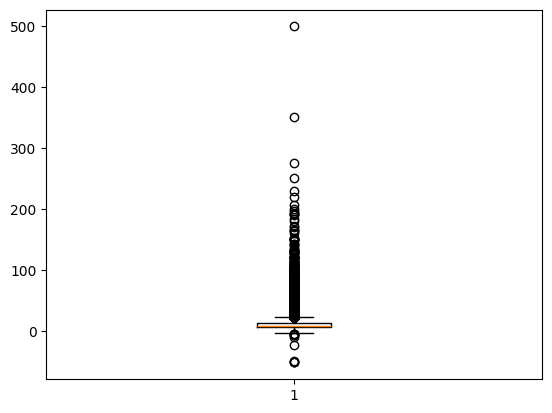

In [9]:
plt.boxplot(df['fare_amount'])

In [10]:
qlow = df["fare_amount"].quantile(0.01)
qhi = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"]<qhi)&(df["fare_amount"]>qlow)]

In [11]:
df['fare_amount']

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
199994,12.0
199996,7.5
199997,30.9
199998,14.5


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df["fare_amount"]
x = df.drop(["fare_amount", "pickup_datetime", "key"], axis=1)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
xtrain.dtypes,ytrain.dtypes

(Unnamed: 0             int64
 pickup_longitude     float64
 pickup_latitude      float64
 dropoff_longitude    float64
 dropoff_latitude     float64
 passenger_count        int64
 dtype: object,
 dtype('float64'))

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [17]:
predict = model.predict(xtest)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(ytest, predict))
r2 = r2_score(ytest, predict)

print(rmse, r2)

8.064306772602377 -0.00013645449841304114


In [23]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators=30, random_state=1)

In [24]:
rfmodel.fit(xtrain, ytrain)
rfpred = rfmodel.predict(xtest)

In [25]:
rfr_rmse = np.sqrt(mean_squared_error(ytest, rfpred))
rfr_r2 = r2_score(ytest, rfpred)

print("Random Forest → RMSE:", rfr_rmse, "R²:", rfr_r2)

Random Forest → RMSE: 3.7407002357717327 R²: 0.784805587459289
